In [1]:
%pdb
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
from collections import defaultdict
from os.path import join, basename, splitext

Automatic pdb calling has been turned ON


In [2]:
exps = ['poet_v20', 'poet_v20a', 'poet_v20b', 'poet_v20c']

In [3]:
parent_dict = {}
scores = defaultdict(list)
for exp in exps:
    log_dir = join('logs', exp)
    log_files = glob(join(log_dir, '*.log'))
    for log_file in log_files:
        data = pd.read_csv(log_file, header=0)
        this = splitext(basename(log_file))[0].split(exp+'.')[1]
        parent = data['parent'][0]
        parent_dict[this] = parent
        if this in scores:
            scores[this][0] += data['iteration'].to_numpy().tolist()
            scores[this][1] += data['score'].to_numpy().tolist()
        else:
            scores[this].append(data['iteration'].to_numpy().tolist())
            scores[this].append(data['score'].to_numpy().tolist())

No handles with labels found to put in legend.


<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

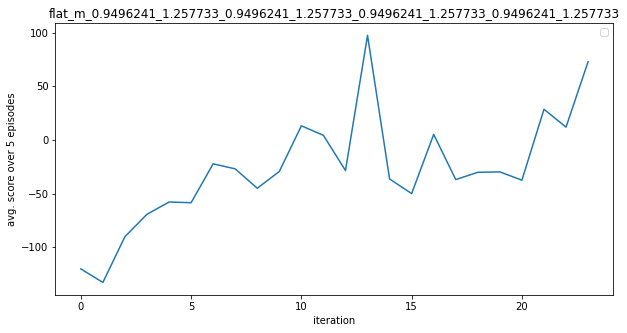

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

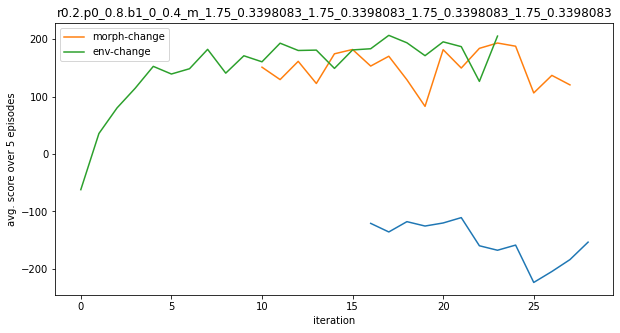

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

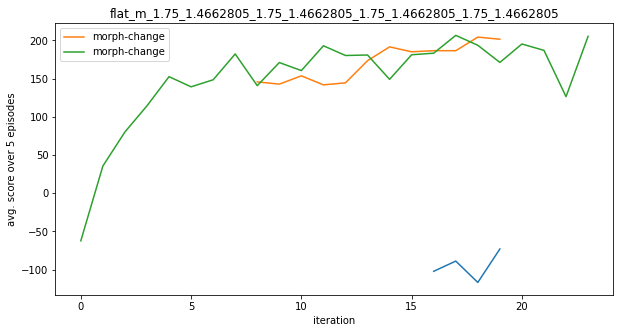

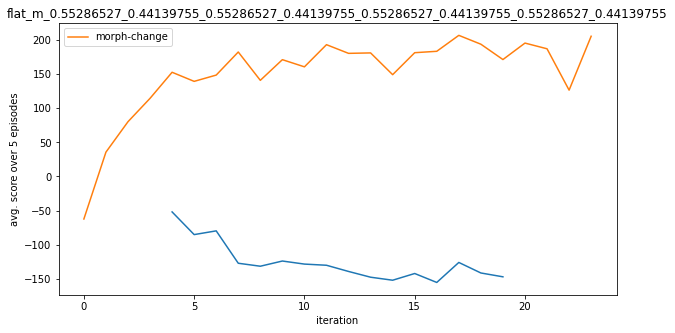

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

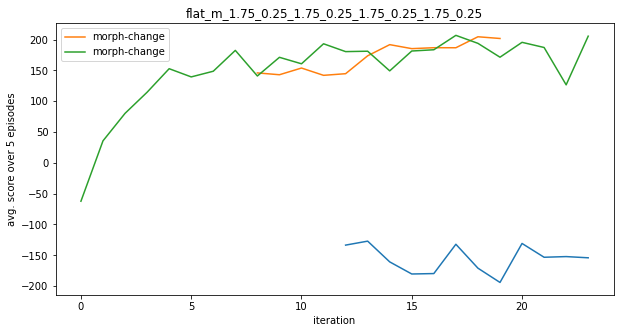

<Figure size 720x360 with 0 Axes>

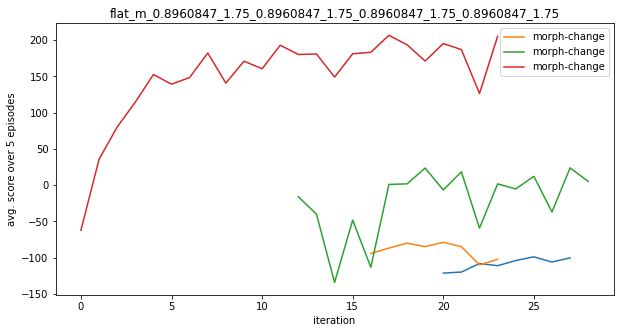

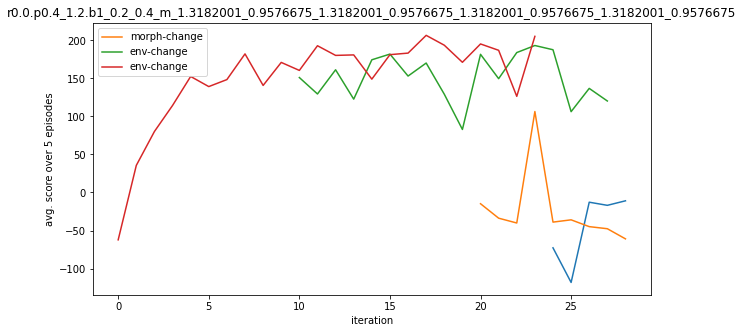

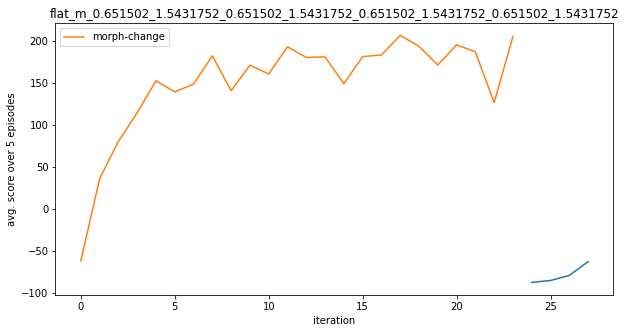

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

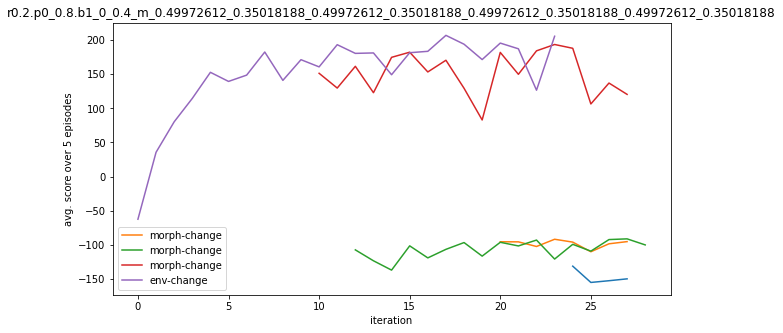

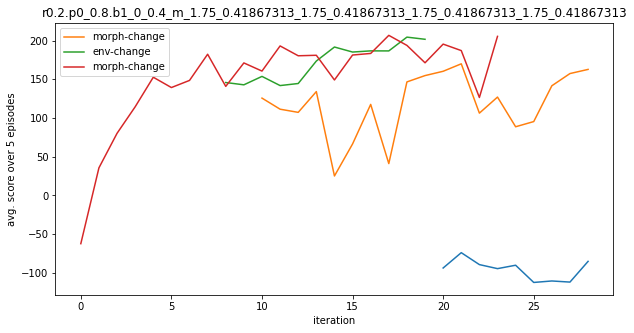

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

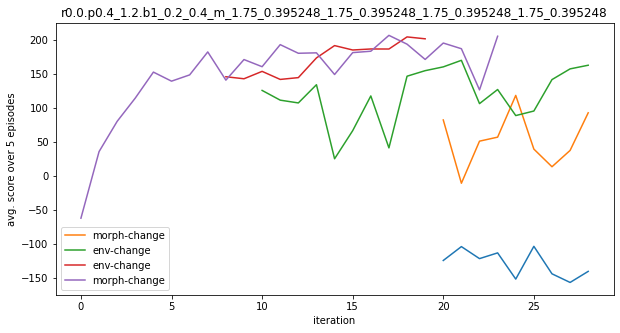

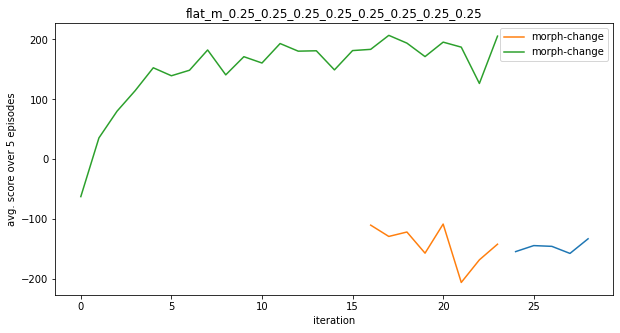

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

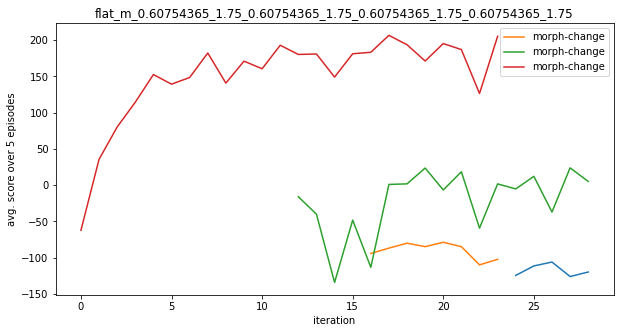

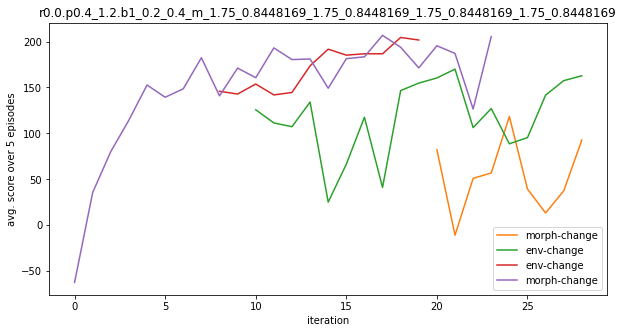

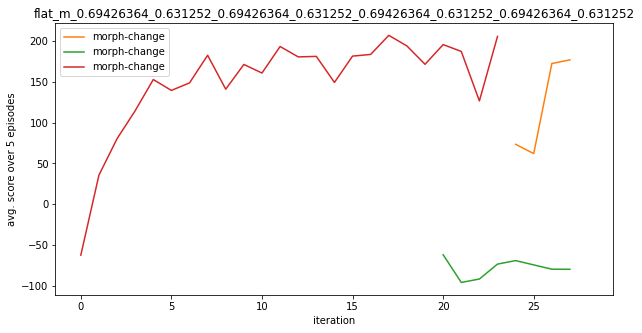

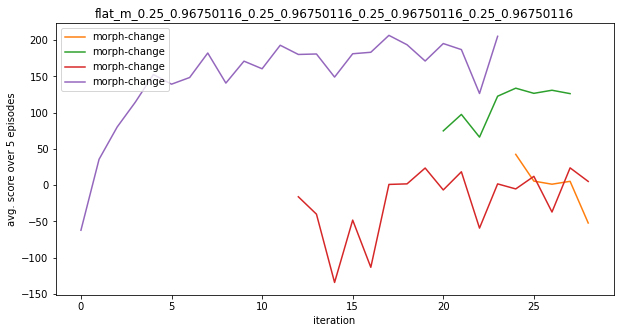

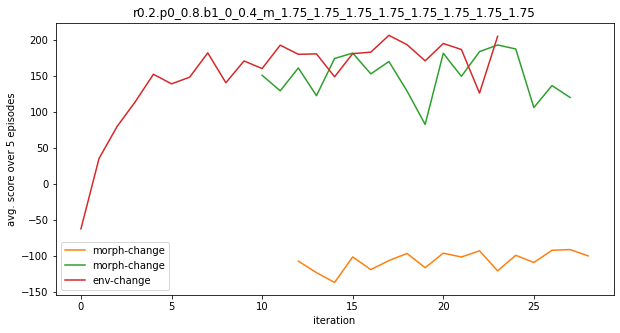

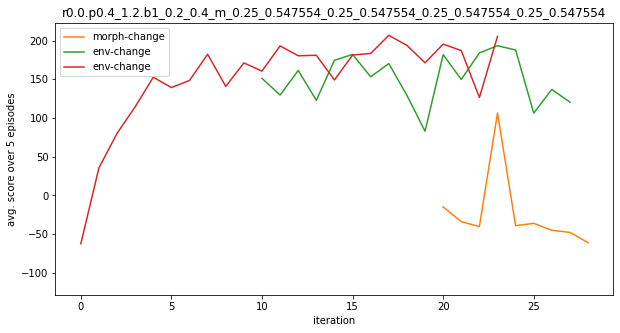

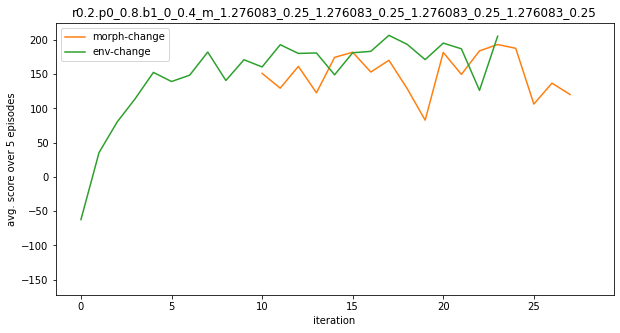

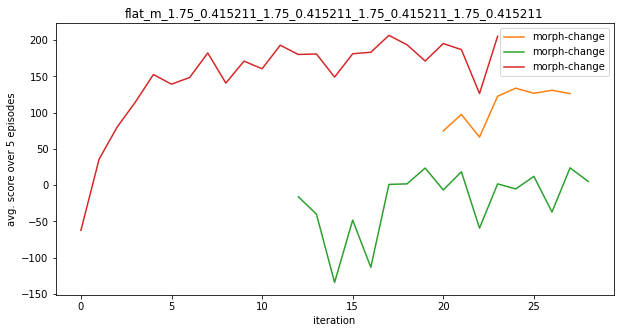

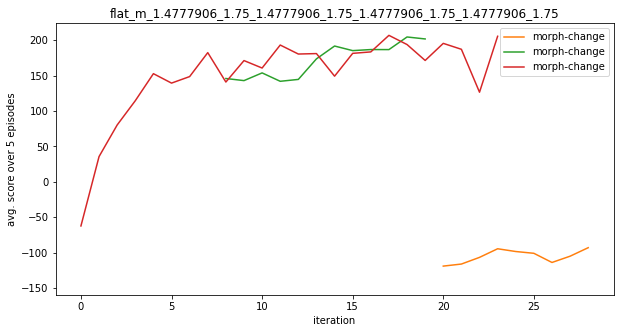

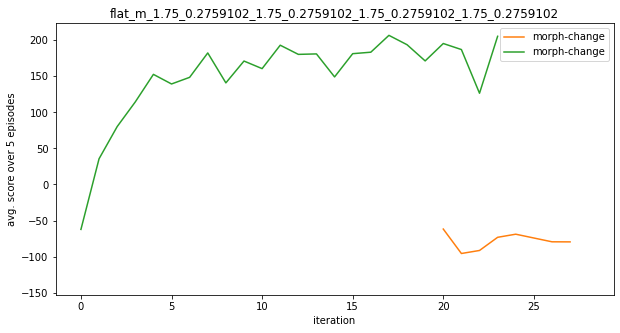

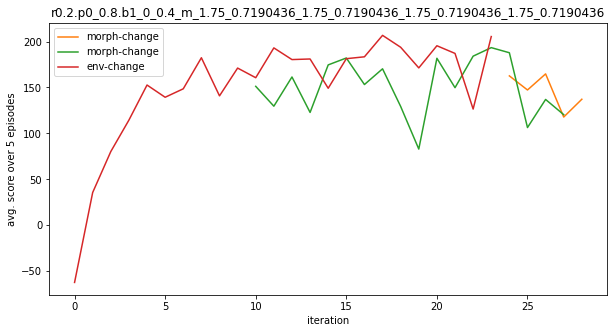

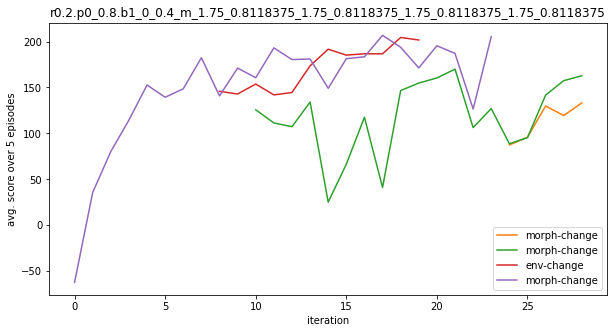

In [4]:
all_parents = [*parent_dict.values()]
for agent in scores:
    plt.figure(figsize=(10, 5))
    if agent not in all_parents:
        plt.plot(scores[agent][0], scores[agent][1])
        parent = parent_dict[agent]
        child = agent
        while parent != -1:
            child_env, child_morph = child.split('_m_')
            parent_env, parent_morph = parent.split('_m_')
            label = []
            if child_morph != parent_morph:
                label.append('morph-change')
            if child_env != parent_env:
                label.append('env-change')
            plt.plot(scores[parent][0], scores[parent][1], label='-'.join(label))
            child = parent
            parent = parent_dict[child]
        plt.title(agent)
        plt.legend()
        plt.xlabel('iteration')
        plt.ylabel('avg. score over 5 episodes')
        plt.show()

In [10]:
agent = 'r0.5.p0.0_1.2.b1_0.0_0.6_m_0.5062966_1.049278_0.5062966_1.049278_0.5062966_1.049278_0.5062966_1.049278'


In [13]:
parent = parent_dict[agent]
while parent != -1:
    print(parent)
    parent = parent_dict[parent]

r0.0.p0_0.8.b1_0_0.4_m_0.5062966_1.049278_0.5062966_1.049278_0.5062966_1.049278_0.5062966_1.049278
r0.0.p0_0.8.b1_0_0.4_m_1.225738_1.170887_1.225738_1.170887_1.225738_1.170887_1.225738_1.170887
r0.0.p0_0.8.b1_0_0.4_m_0.7675506_0.7725091_0.7675506_0.7725091_0.7675506_0.7725091_0.7675506_0.7725091
r0.0.p0_0.8.b1_0_0.4_m_0.7317697_0.8575647_0.7317697_0.8575647_0.7317697_0.8575647_0.7317697_0.8575647
flat_m_0.7317697_0.8575647_0.7317697_0.8575647_0.7317697_0.8575647_0.7317697_0.8575647
flat_m_0.39311105_0.79122686_0.39311105_0.79122686_0.39311105_0.79122686_0.39311105_0.79122686
flat_m_1.432771_0.7252295_1.432771_0.7252295_1.432771_0.7252295_1.432771_0.7252295
flat_m_1.75_0.58469623_1.75_0.58469623_1.75_0.58469623_1.75_0.58469623
flat_m_1.3651912_0.8332556_1.3651912_0.8332556_1.3651912_0.8332556_1.3651912_0.8332556


In [14]:
parent

-1